# Brazilian Chamber of Deputies 

The Open Data from Chamber service provides a collection of features that allow direct access to legislative data produced in the Chamber of Deputies, such as data on deputies, legislative bodies, proposals, plenary sessions, and committee meetings. 

There are two different ways to obtain this data. 

1. Through the available API, with `DadosAbertosBrasil` package developed by Gustavo Furtado or directly with `requests` package. 

2. Download `json` or `csv` formats from the website. 

Open data API website: https://dadosabertos.camara.leg.br/swagger/api.html#api

`DadosAbertosBrasil` package website: https://www.gustavofurtado.com/DadosAbertosBrasil/camara.html#documentacao-da-api-original

If necessary, install it.  

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import networkx as nx

from DadosAbertosBrasil import camara

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json
import time, tqdm
import requests

## Notebook settings 

In [2]:
api = "https://dadosabertos.camara.leg.br/api/v2/"

## Party blocs (Blocos partidários)

The parties can join party blocs to work with a single leader and the same vice-leaders, where there are common interests. The blocs can only exist until the end of the legislature in which they were created. Apparently, there is non enough data related to that. 

In [4]:
text = ''

for leg in tqdm.tqdm(range(1,57)):
    blocks = camara.lista_blocos(legislatura=leg)
    num = blocks.shape[0]
    if num > 0: 
        text += "Legislatura {} teve {} blocos partidários. \n\n".format(leg,num)
    time.sleep(3)

100%|██████████| 56/56 [03:27<00:00,  3.71s/it]


In [5]:
print(text)

Legislatura 54 teve 15 blocos partidários. 

Legislatura 55 teve 10 blocos partidários. 

Legislatura 56 teve 7 blocos partidários. 




In [12]:
camara.Bloco(cod = blocks.loc[0].id).dados

{'id': '579',
 'uri': 'https://dadosabertos.camara.leg.br/api/v2/blocos/579',
 'nome': 'CIDADANIA, PV',
 'idLegislatura': '56'}

## Deputies

Basic data about deputies who have been in parliamentary exercise at some time interval.

In [35]:
deputies = camara.lista_deputados(legislatura=56)

<AxesSubplot:>

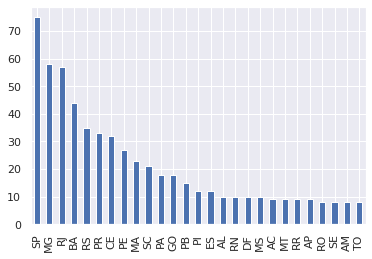

In [43]:
deputies.siglaUf.value_counts().plot.bar()

In [78]:
n = 7
prop_years = np.zeros((3,n))
prop_years[0,:] = range(57-n,57)

for leg in tqdm.tqdm(prop_years[0,:].astype(int)): 
    
    deputies_F = camara.lista_deputados(legislatura=leg, sexo='F')
    deputies_M = camara.lista_deputados(legislatura=leg, sexo='M')
    
    prop_years[1,leg-50] = deputies_F.shape[0]/(deputies_F.shape[0]+deputies_M.shape[0])
    prop_years[2,leg-50] = 1 - prop_years[1,leg-50]
    
    time.sleep(3)

100%|██████████| 7/7 [00:30<00:00,  4.37s/it]


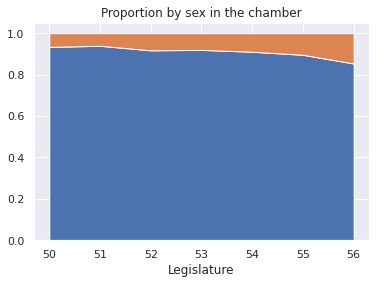

In [83]:
plt.stackplot(prop_years[0,:],  prop_years[2,:], prop_years[1,:])
plt.title('Proportion by sex in the chamber')
plt.xlabel('Legislature')
plt.show()

In [99]:
number_parties = []

for leg in tqdm.tqdm(range(38,57)):
    
    parties_leg = camara.lista_deputados(legislatura=leg).siglaPartido.unique().shape[0]
    number_parties.append(parties_leg)
    
    time.sleep(2)

100%|██████████| 19/19 [01:02<00:00,  3.27s/it]


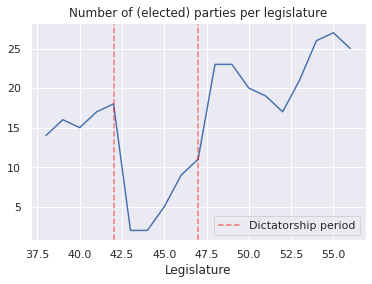

In [105]:
plt.plot(range(38,57), number_parties)
plt.axvline(42, color = 'red', alpha = 0.5, linestyle = '--', label = 'Dictatorship period')
plt.axvline(47, color = 'red', alpha = 0.5, linestyle = '--')
plt.xlabel('Legislature')
plt.title('Number of (elected) parties per legislature')
plt.legend()
plt.show()